In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
df = pd.read_csv('Desktop/Project_D/British_airlines_dataset.csv', encoding = 'unicode_escape') 



In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [27]:
df=pd.read_csv("Desktop/Project_D/British_airlines_dataset.csv")

In [4]:
df.head()

,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,recommended,trip_verified,rating,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment
0,service was mediocre at best,Gary Storer,03-10-2023,United Kingdom,"Just returned from Chicago, flew out 10 days ...",A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,01-10-2023,no,Not Verified,2,2,3,1,2,2,-1
1,BA standards continue to decline,A Jensen,02-10-2023,United Kingdom,BA standards continue to decline every time ...,A320,Business,Business Class,London Heathrow to Munich,01-09-2023,no,Verified,2,2,1,2,1,1,-1
2,"won the race to the bottom""",John Rockett,02-10-2023,United Kingdom,Awful. Business class check in queue just as...,A320,Couple Leisure,Business Class,Heathrow to Istanbul,01-09-2023,no,Not Verified,2,2,3,2,1,1,-1
3,Not a reliable airline,Tatiana Bobrovskaya,02-10-2023,United Kingdom,Not a reliable airline. You cannot trust the...,A320,Business,Economy Class,London to Geneva,01-10-2023,no,Verified,3,4,4,2,1,1,-1
4,Very disappointed,Tom Slowbe,28-09-2023,United States,"The airplanes and the lounges are worn out, o...",777-300 and A320,Couple Leisure,First Class,Dallas to Dubrovnik via Heathrow,01-09-2023,no,Verified,1,1,4,4,3,2,3


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   header               1324 non-null   object
 1   author               1324 non-null   object
 2   date                 1324 non-null   object
 3   place                1324 non-null   object
 4   content              1324 non-null   object
 5   aircraft             1324 non-null   object
 6   traveller_type       1323 non-null   object
 7   seat_type            1324 non-null   object
 8   route                1324 non-null   object
 9   date_flown           1324 non-null   object
 10  recommended          1324 non-null   object
 11  trip_verified        1324 non-null   object
 12  rating               1324 non-null   int64 
 13  seat_comfort         1324 non-null   int64 
 14  cabin_staff_service  1324 non-null   int64 
 15  food_beverages       1324 non-null   int64 
 16  ground

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,1324.0,4.188822,3.253325,1.0,1.0,3.0,7.0,10.0
seat_comfort,1324.0,2.870091,1.386049,-1.0,2.0,3.0,4.0,5.0
cabin_staff_service,1324.0,3.280211,1.520592,-1.0,2.0,4.0,5.0,5.0
food_beverages,1324.0,2.381420,1.697979,-1.0,1.0,2.0,4.0,5.0
ground_service,1324.0,3.031722,1.405815,-1.0,2.0,3.0,4.0,5.0
value_for_money,1324.0,2.777946,1.409587,1.0,1.0,3.0,4.0,5.0
entertainment,1324.0,1.435801,2.096598,-1.0,-1.0,1.0,3.0,5.0


In [7]:
df.isnull().sum()

header                 0
author                 0
date                   0
place                  0
content                0
aircraft               0
traveller_type         1
seat_type              0
route                  0
date_flown             0
recommended            0
trip_verified          0
rating                 0
seat_comfort           0
cabin_staff_service    0
food_beverages         0
ground_service         0
value_for_money        0
entertainment          0
dtype: int64

In [8]:
df.nunique()

header                 1300
author                  833
date                    938
place                    56
content                1324
aircraft                150
traveller_type            4
seat_type                 4
route                   836
date_flown               88
recommended               2
trip_verified             2
rating                   10
seat_comfort              6
cabin_staff_service       6
food_beverages            6
ground_service            6
value_for_money           5
entertainment             6
dtype: int64

In [9]:
df["date"]=pd.to_datetime(df["date"],format='%d-%m-%Y')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   header               1324 non-null   object        
 1   author               1324 non-null   object        
 2   date                 1324 non-null   datetime64[ns]
 3   place                1324 non-null   object        
 4   content              1324 non-null   object        
 5   aircraft             1324 non-null   object        
 6   traveller_type       1323 non-null   object        
 7   seat_type            1324 non-null   object        
 8   route                1324 non-null   object        
 9   date_flown           1324 non-null   object        
 10  recommended          1324 non-null   object        
 11  trip_verified        1324 non-null   object        
 12  rating               1324 non-null   int64         
 13  seat_comfort         1324 non-nul

In [11]:
df["date_flown"]=pd.to_datetime(df["date_flown"],format='%d-%m-%Y')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   header               1324 non-null   object        
 1   author               1324 non-null   object        
 2   date                 1324 non-null   datetime64[ns]
 3   place                1324 non-null   object        
 4   content              1324 non-null   object        
 5   aircraft             1324 non-null   object        
 6   traveller_type       1323 non-null   object        
 7   seat_type            1324 non-null   object        
 8   route                1324 non-null   object        
 9   date_flown           1324 non-null   datetime64[ns]
 10  recommended          1324 non-null   object        
 11  trip_verified        1324 non-null   object        
 12  rating               1324 non-null   int64         
 13  seat_comfort         1324 non-nul

In [13]:
df["time difference"]=df["date"]-df["date_flown"]

In [14]:
df["time difference"]

0       2 days
1      31 days
2      31 days
3       1 days
4      27 days
         ...  
1319   25 days
1320   24 days
1321   23 days
1322   22 days
1323   22 days
Name: time difference, Length: 1324, dtype: timedelta64[ns]

header                         object
author                         object
date                   datetime64[ns]
place                          object
content                        object
aircraft                       object
traveller_type                 object
seat_type                      object
route                          object
date_flown             datetime64[ns]
recommended                    object
trip_verified                  object
rating                          int64
seat_comfort                    int64
cabin_staff_service             int64
food_beverages                  int64
ground_service                  int64
value_for_money                 int64
entertainment                   int64
dtype: object


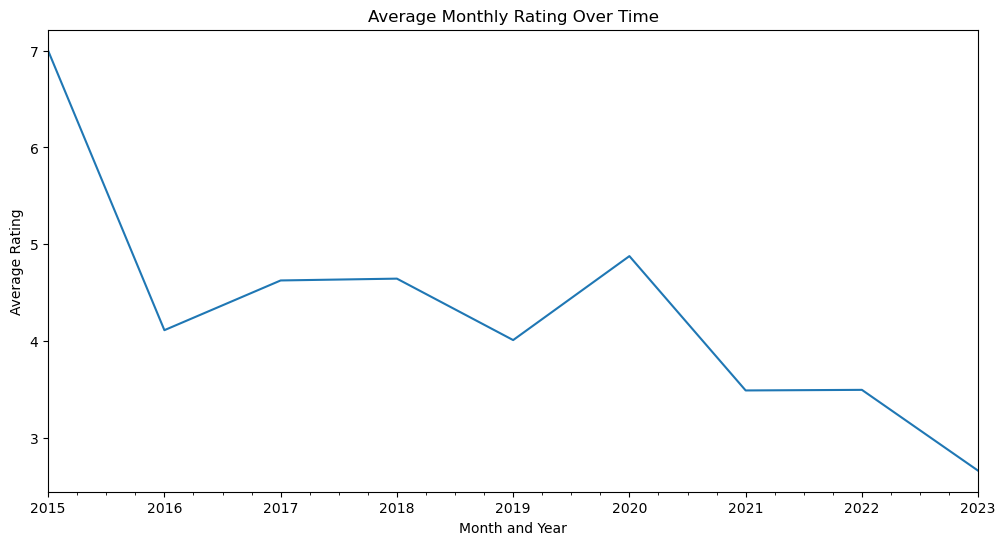

In [32]:
# Correcting the date format conversion and handling potential errors
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date_flown'] = pd.to_datetime(df['date_flown'], errors='coerce')

# Verifying the conversion by checking the data types
print(df.dtypes)

# If the conversion is successful, repeat the trend analysis
import matplotlib.pyplot as plt

# Group by month and year of 'date_flown' and calculate the average rating
monthly_ratings = df.groupby(df['date_flown'].dt.to_period('M'))['rating'].mean()

# Plotting
plt.figure(figsize=(12, 6))
monthly_ratings.plot(title='Average Monthly Rating Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Average Rating')
plt.show()

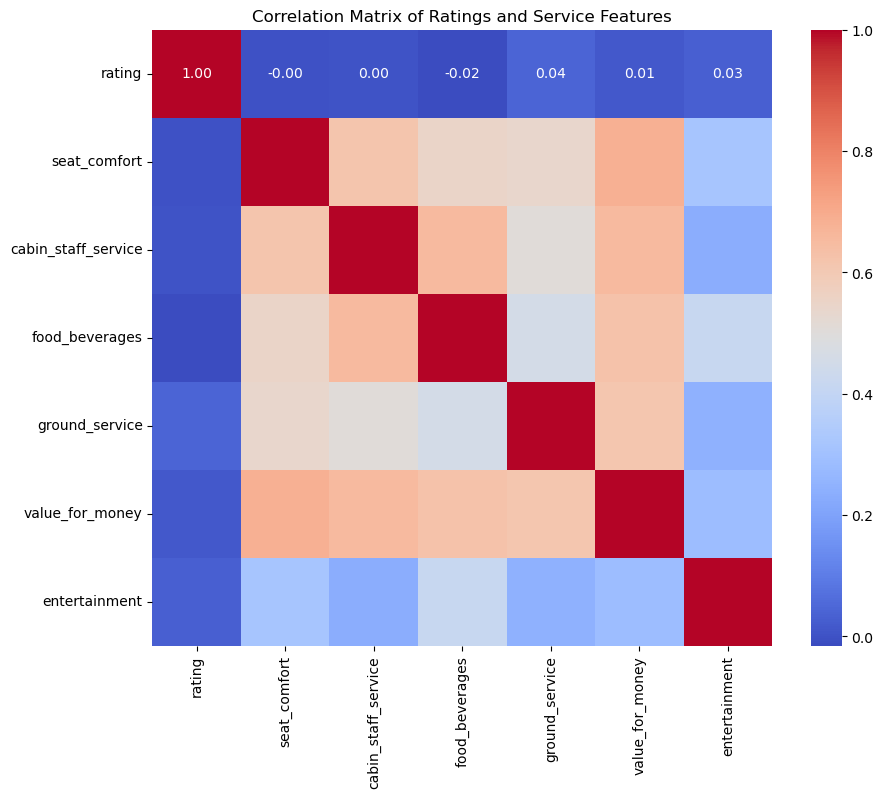

In [33]:
# Select columns for correlation analysis
service_cols = ['rating', 'seat_comfort', 'cabin_staff_service', 'food_beverages', 'ground_service', 'value_for_money', 'entertainment']

# Calculate correlation matrix
corr_matrix = df[service_cols].corr()

# Plotting the correlation matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Ratings and Service Features')
plt.show()

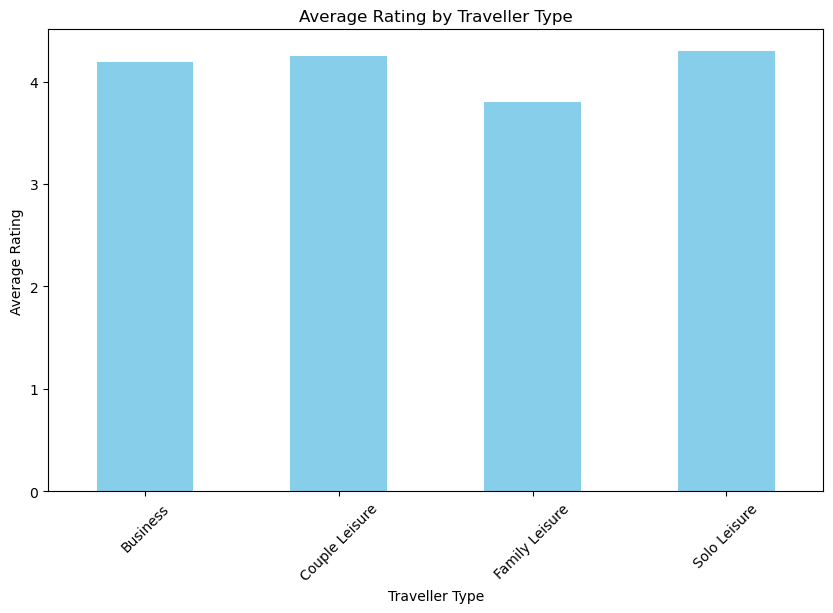

In [34]:
# Grouping data by traveller type and calculating average rating
ratings_by_traveller = df.groupby('traveller_type')['rating'].mean()

# Plotting
plt.figure(figsize=(10, 6))
ratings_by_traveller.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

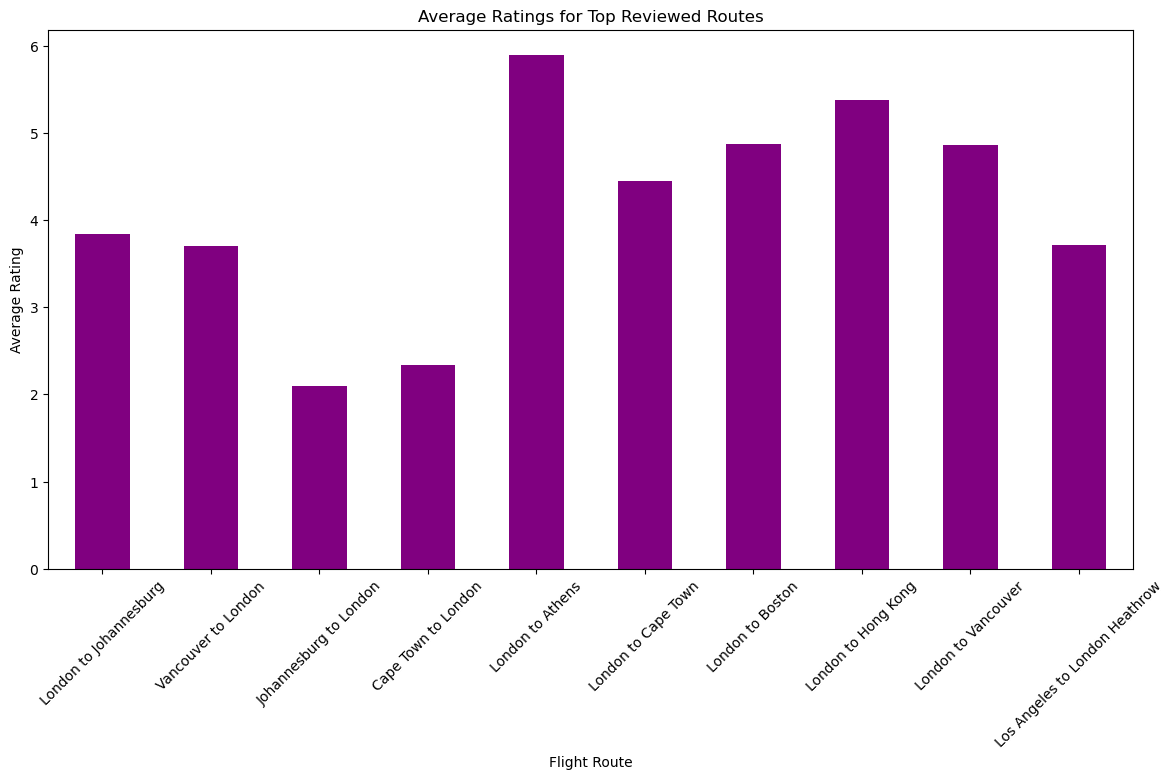

In [36]:
# Most reviewed routes with average ratings
route_reviews = df.groupby('route')['rating'].agg(['mean', 'count']).sort_values(by='count', ascending=False).head(10)

# Plotting average ratings for top reviewed routes
plt.figure(figsize=(14, 7))
route_reviews['mean'].plot(kind='bar', color='purple')
plt.title('Average Ratings for Top Reviewed Routes')
plt.xlabel('Flight Route')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()